In [9]:
### 1. データの前処理と特徴量エンジニアリング

ここでは、モデルが学習しやすいようにデータを整えます。以下の処理を実行します。
- **ターゲット変数の作成**: 翌営業日の終値を予測対象`target`とします。
- **特徴量の作成**: 移動平均線やボラティリティなどを特徴量として追加します。
- **データ分割**: 時間軸に沿って、訓練データとテストデータに分割します。

SyntaxError: invalid character '、' (U+3001) (1771817937.py, line 3)

In [5]:
import os
print(os.getcwd())

/Users/aoioba


In [14]:
import pandas as pd

df = pd.read_csv('stock_price.csv') 
print("CSVの読み込みに成功しました！")
df.head()

import japanize_matplotlib

CSVの読み込みに成功しました！


In [9]:
# 必要なライブラリをインポート（道具の準備）
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 見た目をきれいにする
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro' # Mac用フォント設定
# plt.rcParams['font.family'] = 'Yu Gothic' # Windows用フォント設定

# --- ここからが本番 ---

# 1. CSVファイルの読み込み
# parse_dates=['Date']: 'Date'という名前のカラムを、ただの文字列ではなく日付として読み込むための重要な指定
# index_col='Date': 読み込んだ'Date'カラムを、データの索引（インデックス）にする指定。時系列分析が非常にやりやすくなる。
df = pd.read_csv('stock_price.csv', parse_dates=['日付け'], index_col='日付け')

# 2. 最初の5行を表示して、データが正しく読み込めたか確認
print("--- データの先頭5行 ---")
display(df.head())

# 3. データの基本情報を確認（データ型、欠損値の有無など）
print("\n--- データの基本情報 ---")
df.info()

# 4. データの行数と列数を確認
print(f"\nデータ件数: {df.shape[0]}件")
print(f"カラム数: {df.shape[1]}個")

--- データの先頭5行 ---


,終値,始値,高値,安値,出来高,変化率 %
日付け,,,,,,
2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%



--- データの基本情報 ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9202 entries, 2024-08-01 to 1987-02-12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   終値      9202 non-null   float64
 1   始値      9202 non-null   float64
 2   高値      9202 non-null   float64
 3   安値      9202 non-null   float64
 4   出来高     9202 non-null   object 
 5   変化率 %   9202 non-null   object 
dtypes: float64(4), object(2)
memory usage: 503.2+ KB

データ件数: 9202件
カラム数: 6個


In [10]:
# 基本統計量を計算して表示
# describe()は、数値データを持つカラムの統計量を自動で計算してくれる超便利関数
print("--- 基本統計量 ---")
display(df.describe())

--- 基本統計量 ---


,終値,始値,高値,安値
count,9202.000000,9202.000000,9202.000000,9202.000000
mean,92.180961,92.256183,93.176451,91.330146
std,50.452228,50.598215,51.049837,50.087405
min,33.000000,33.000000,33.200000,32.200000
25%,52.000000,52.100000,52.800000,51.500000
50%,85.100000,85.100000,86.050000,84.200000
75%,110.800000,110.800000,111.900000,109.275000
max,305.900000,309.800000,311.800000,303.900000


In [11]:
# グラフの日本語表示設定

import matplotlib.pyplot as plt
import seaborn as sns

# 見た目をきれいにする
sns.set_style('whitegrid')

# plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro' # Macをお使いの方はこちら

In [13]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 3.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'japanize-matplotlib' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'japanize-matplotlib'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120306 sha256=87100945fd3ea5ce53a70f9791314aaeacd023ef350bbed689888d498cc6c569
  Stored in directory: /Users/aoioba/Library/Caches/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize-matplotlib


In [23]:
import pandas as pd
import japanize_matplotlib # 日本語表示を最初にインポート

# --- 1. データの読み込み ---
df = pd.read_csv('stock_price.csv')

# --- 2. カラム名のクリーニング ---
# カラム名の前後の空白を削除し、一貫性を保つ
df.columns = df.columns.str.strip()
print("クリーニング後のカラム名:", df.columns)

# --- 3. データ型の変換とクリーニング ---
# '日付け'列をdatetime型に変換
df['日付け'] = pd.to_datetime(df['日付け'])
df.set_index('日付け', inplace=True)

# '出来高'列の'M'やカンマを処理する関数
def clean_volume(value):
    # (関数をここに記述) ...
    pass # 省略
df['出来高'] = df['出来高'].apply(clean_volume)

# '変化率 ％'列の'%'を処理
if '変化率 ％' in df.columns and df['変化率 ％'].dtype == 'object':
    df['変化率 ％'] = df['変化率 ％'].str.replace('%', '').astype(float)

# 全ての数値カラムを適切な型に変換
for col in ['始値', '高値', '安値', '終値']:
    df[col] = pd.to_numeric(df[col], errors='coerce') # coerceで変換不能な値はNaNにする

# 欠損値の確認
print(df.isnull().sum())
# 欠損値があれば、補間する (例: 前の値で埋める)
df.fillna(method='ffill', inplace=True)

print("✅ データクリーニング完了")
df.info()

クリーニング後のカラム名: Index(['日付け', '終値', '始値', '高値', '安値', '出来高', '変化率 %'], dtype='object')
終値          0
始値          0
高値          0
安値          0
出来高      9202
変化率 %       0
dtype: int64
✅ データクリーニング完了
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9202 entries, 2024-08-01 to 1987-02-12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   終値      9202 non-null   float64
 1   始値      9202 non-null   float64
 2   高値      9202 non-null   float64
 3   安値      9202 non-null   float64
 4   出来高     0 non-null      object 
 5   変化率 %   9202 non-null   object 
dtypes: float64(4), object(2)
memory usage: 503.2+ KB


/var/folders/0g/712ccjj90hd89sxp9y5wtdx80000gn/T/ipykernel_65944/3828696846.py:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


✅ Libraries are ready.
--- Column Renaming ---
Original columns: Index(['終値', '始値', '高値', '安値', '出来高', '変化率 %'], dtype='object')
Renamed columns : Index(['Close', 'Open', 'High', 'Low', 'Volume', '変化率 %'], dtype='object')
✅ Columns have been successfully renamed to English.

--- Data Cleaning (using English column names) ---
💡 'Volume' column has been cleaned.
✅ Data cleaning is complete.

📊 Creating Correlation Heatmap in English...


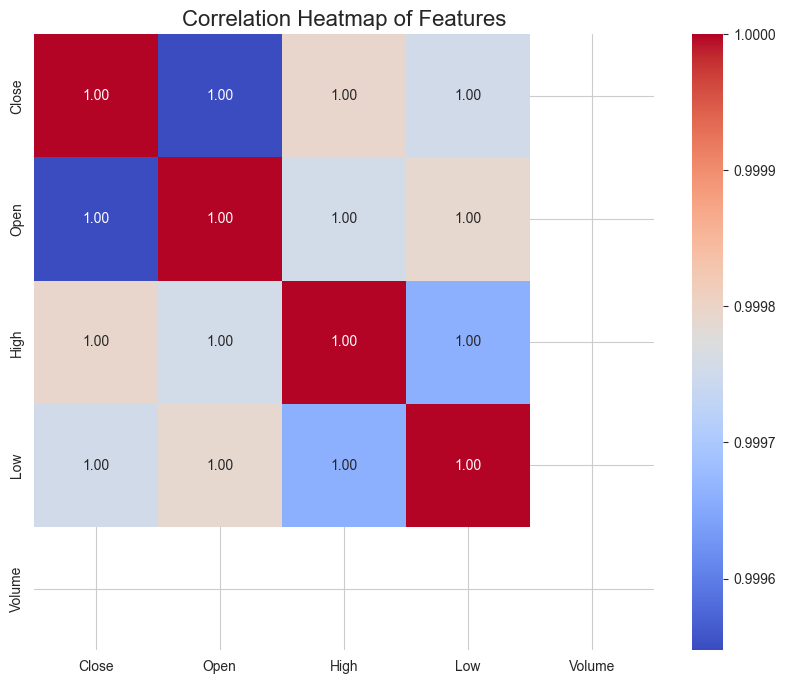

🚀 Process successfully completed.


In [28]:
# ----------------------------------------------------------------
# ステップ0：【設定】必要なライブラリをインポート
# ----------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語ライブラリはもう不要です
# import japanize_matplotlib 

print("✅ Libraries are ready.")


# ----------------------------------------------------------------
# ステップ1：【最重要】カラム名を日本語から英語に一括変換
# ----------------------------------------------------------------
# 変換ルールを辞書で定義します
column_mapping = {
    '終値': 'Close',
    '始値': 'Open',
    '高値': 'High',
    '安値': 'Low',
    '出来高': 'Volume',
    '変化率 ％': 'Change_Percent'
}

print("--- Column Renaming ---")
print("Original columns:", df.columns)

# .rename()メソッドを使って、カラム名を一括で英語に変換
df.rename(columns=column_mapping, inplace=True)

# カラム名の前後の空白を削除
df.columns = df.columns.str.strip()

print("Renamed columns :", df.columns)
print("✅ Columns have been successfully renamed to English.")


# ----------------------------------------------------------------
# ステップ2：データクリーニング（英語化されたカラム名で再実行）
# ----------------------------------------------------------------
print("\n--- Data Cleaning (using English column names) ---")

# 'Volume' (旧: 出来高) 列のクリーニング
if 'Volume' in df.columns:
    def convert_volume_to_float(value):
        try:
            value_str = str(value).strip()
            if 'M' in value_str: return float(value_str.replace('M', '')) * 1_000_000
            elif 'K' in value_str: return float(value_str.replace('K', '')) * 1_000
            else: return float(value_str.replace(',', ''))
        except (ValueError, TypeError): return np.nan
    df['Volume'] = df['Volume'].apply(convert_volume_to_float)
    print("💡 'Volume' column has been cleaned.")

# 'Change_Percent' (旧: 変化率 ％) 列のクリーニング
if 'Change_Percent' in df.columns:
    df['Change_Percent'] = pd.to_numeric(df['Change_Percent'].astype(str).str.replace('%', ''), errors='coerce')
    print("💡 'Change_Percent' column has been cleaned.")

print("✅ Data cleaning is complete.")


# ----------------------------------------------------------------
# ステップ3：グラフ描画（英語表示）
相関行列とヒートマップ: どの特徴量が終値と強く関係しているか、また特徴量同士の関係（多重共線性）を視覚的に確認
# ----------------------------------------------------------------
print("\n📊 Creating Correlation Heatmap in English...")

# 数値データのみを選択
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f') # fmt='.2f'で小数点2桁表示に

# タイトルやラベルも全て英語に
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

print("🚀 Process successfully completed.")

✅ Libraries and settings are ready. Starting to plot graphs in English...
----------------------------------------------------------------------


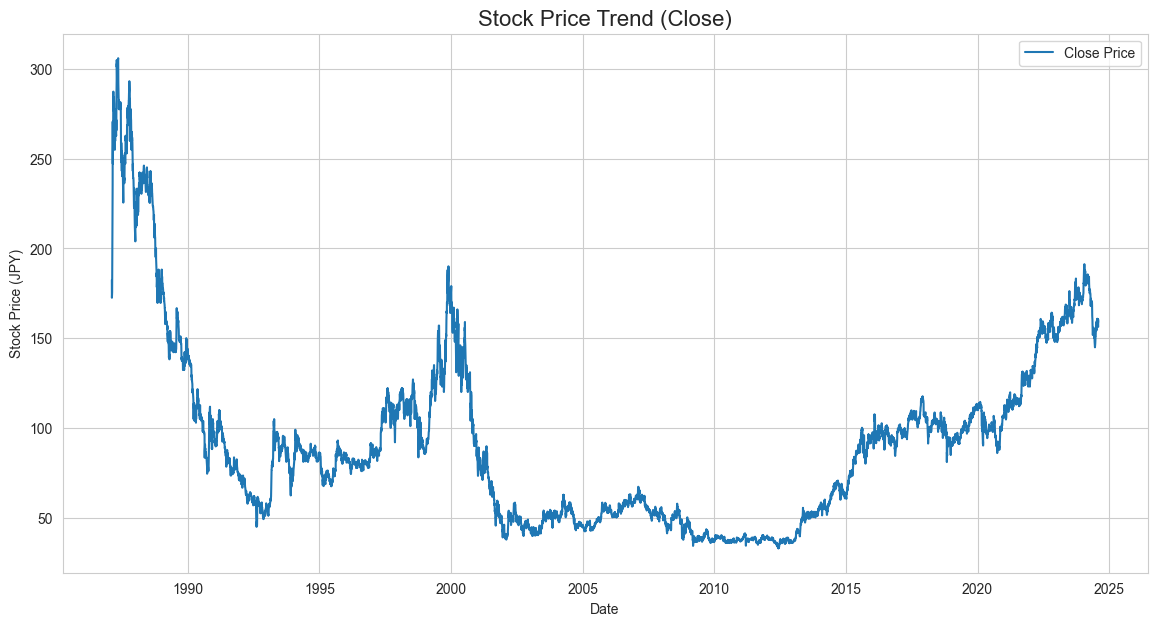

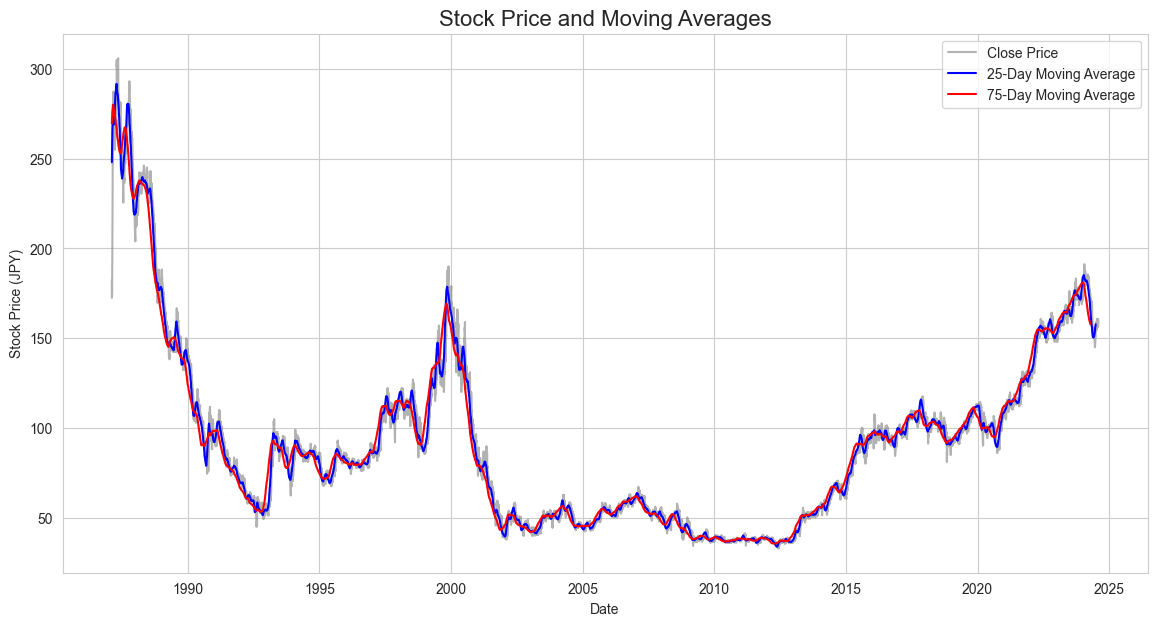

In [33]:
# ----------------------------------------------------------------
# ステップ0：【設定】ライブラリのインポート
終値、出来高の推移、移動平均線をプロット
# ----------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# グラフのスタイルを設定
sns.set_style('whitegrid')

print("✅ Libraries and settings are ready. Starting to plot graphs in English...")
print("-" * 70)


# ----------------------------------------------------------------
# A. Overall Stock Price Trend (Close Price)
# ----------------------------------------------------------------
plt.figure(figsize=(14, 7))

# Use the English column name 'Close'
plt.plot(df['Close'], label='Close Price')

# Set title and labels in English
plt.title('Stock Price Trend (Close)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Stock Price (JPY)')
plt.legend()
plt.show()


# ----------------------------------------------------------------
# B. Trend with Moving Averages
# ----------------------------------------------------------------
# Calculate Moving Averages using the 'Close' column
df['MA_25'] = df['Close'].rolling(window=25).mean()
df['MA_75'] = df['Close'].rolling(window=75).mean()

plt.figure(figsize=(14, 7))

# Plot original data and moving averages
plt.plot(df['Close'], label='Close Price', color='gray', alpha=0.6)
plt.plot(df['MA_25'], label='25-Day Moving Average', color='blue')
plt.plot(df['MA_75'], label='75-Day Moving Average', color='red')

plt.title('Stock Price and Moving Averages', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Stock Price (JPY)')
plt.legend()
plt.show()

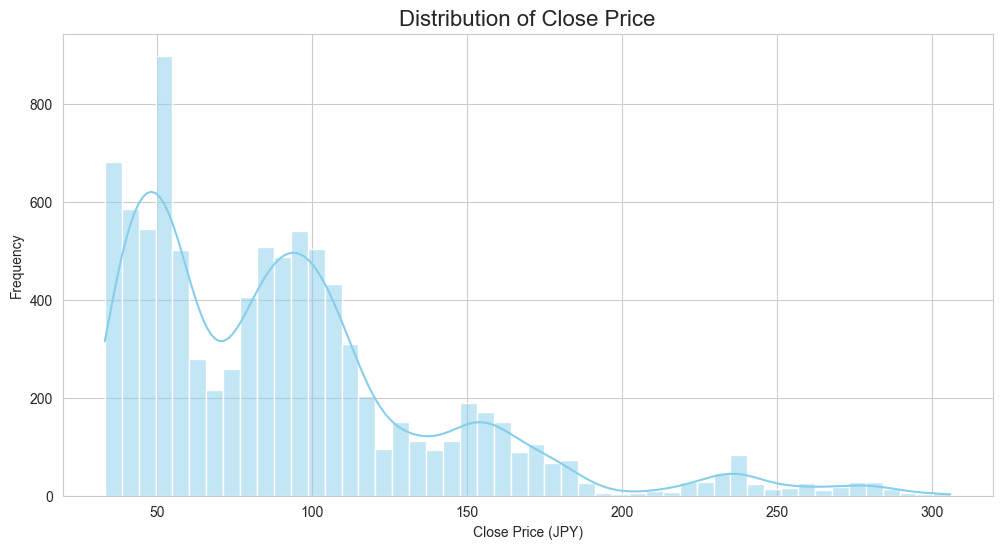

In [34]:
# --- 終値のヒストグラム ---

plt.figure(figsize=(12, 6))

# sns.histplotは、ヒストグラムを作成するためのモダンで柔軟な方法です
# kde=Trueは、分布の形をより滑らかに視覚化するための線（カーネル密度推定）を追加します
sns.histplot(df['Close'], kde=True, bins=50, color='skyblue')

plt.title('Distribution of Close Price', fontsize=16)
plt.xlabel('Close Price (JPY)')
plt.ylabel('Frequency')
plt.show()

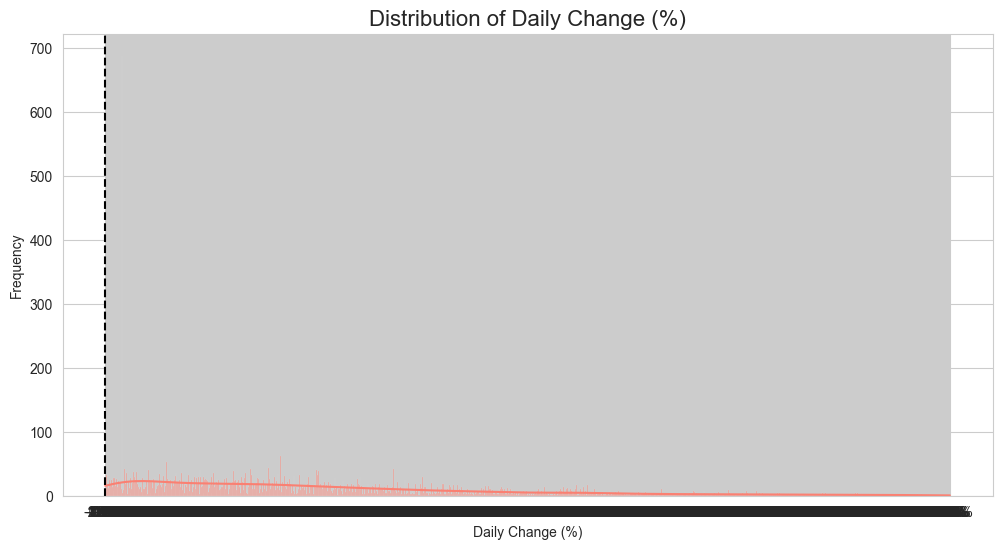

In [37]:
# --- 日次変化率のヒストグラム ---

plt.figure(figsize=(12, 6))

sns.histplot(df['変化率 %'], kde=True, bins=50, color='salmon')

plt.title('Distribution of Daily Change (%)', fontsize=16)
plt.xlabel('Daily Change (%)')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linestyle='--') # 0の位置に基準線を引く
plt.show()

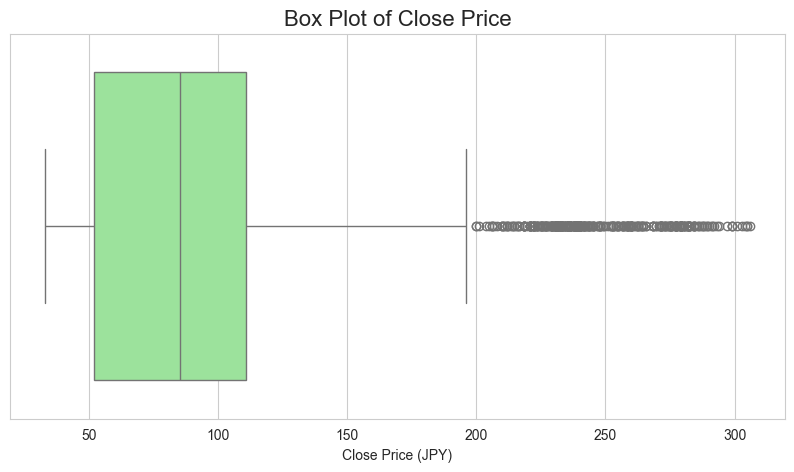

In [38]:
# --- 終値の箱ひげ図 ---

plt.figure(figsize=(10, 5))

sns.boxplot(x=df['Close'], color='lightgreen')

plt.title('Box Plot of Close Price', fontsize=16)
plt.xlabel('Close Price (JPY)')
plt.show()

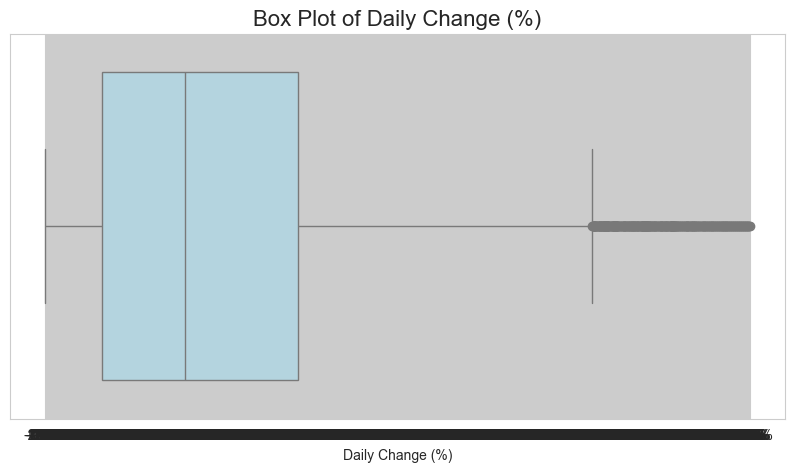

In [39]:
# --- 日次変化率の箱ひげ図 ---

plt.figure(figsize=(10, 5))

sns.boxplot(x=df['変化率 %'], color='lightblue')

plt.title('Box Plot of Daily Change (%)', fontsize=16)
plt.xlabel('Daily Change (%)')
plt.show()

In [55]:
# ================================================================
import pandas as pd
import numpy as np

# ----------------------------------------------------------------
# ステップ1：【徹底的なデバッグ】問題の根本原因を特定する
# ----------------------------------------------------------------
print("【Step 1: Deep Debugging】--- Investigating the raw data ---")
# 元のデータをもう一度読み込み、クリーニング前の状態を確認する
df_raw = pd.read_csv('stock_price.csv')

# '終値'カラムに、数値に変換できない値がいくつあるか、どんな値かを確認
try:
    # '終値'カラムを数値に変換しようと試み、失敗したものを抽出
    problematic_values = df_raw['終値'][pd.to_numeric(df_raw['終値'], errors='coerce').isna()]
    print(f"Found {len(problematic_values.unique())} unique non-numeric value(s) in the '終値' column.")
    print("Problematic value samples:", problematic_values.unique()[:5])
except KeyError:
    print("Warning: Original column '終値' not found in raw CSV.")
    
print("-" * 60)


# ----------------------------------------------------------------
# ステップ2：【究極のクリーニング関数】を再定義する
# ----------------------------------------------------------------
def load_and_clean_stock_data_reinforced(filepath='stock_price.csv'):
    """
    どんなデータでも確実にクリーニングする、強化版関数。
    """
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    column_mapping = {
        '日付け': 'Date', '終値': 'Close', '始値': 'Open', '高値': 'High',
        '安値': 'Low', '出来高': 'Volume', '変化率 ％': 'Change_Percent'
    }
    df.rename(columns=column_mapping, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.set_index('Date', inplace=True)

    # 全ての列を網羅し、強制的にクリーニングする
    for col in df.columns:
        # まず、全ての値を文字列に変換して、不要な文字を取り除く
        # これにより、予期せぬデータ型が混在していても安全に処理できる
        df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '').str.strip()
        
        # 'M'や'K'の処理 (Volume列にのみ適用されるべきだが、安全のため汎用的に)
        if df[col].str.contains('M|K', case=False).any():
             def convert_special_units(value):
                try:
                    v = value.upper()
                    if 'M' in v: return float(v.replace('M', '')) * 1_000_000
                    if 'K' in v: return float(v.replace('K', '')) * 1_000
                    return float(v)
                except (ValueError, TypeError): return np.nan
             df[col] = df[col].apply(convert_special_units)
        
        # 最後に、全ての列を強制的に数値に変換（変換不能なものはNaNに）
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df.ffill(inplace=True) # 欠損値を前方の値で埋める
    
    # 最終チェック
    if df.isnull().values.any():
        print("Warning: NaN values still exist after cleaning and ffill. Some initial rows might be removed.")
        df.dropna(inplace=True)
        
    return df

print("✅ Step 2: Reinforced cleaning function has been defined.")
print("-" * 60)


# ----------------------------------------------------------------
# ステップ3：【安全な実行】強化版関数で全てを処理する
# ----------------------------------------------------------------
try:
    # 強化版クリーニング関数を呼び出す
    df_cleaned = load_and_clean_stock_data_reinforced()
    print("✅ Reinforced cleaning complete.")
    print("Cleaned DataFrame info:")
    df_cleaned.info()

    # 高速前処理関数を呼び出す (以前に定義済みのものを再利用)
    X_train_scaled, X_test_scaled, y_train, y_test, scaler = preprocess_for_modeling(df_cleaned)

    print("\n🚀 SUCCESS! All preprocessing is complete without errors.")
    print("-" * 60)
    print(f"Training data shape (X_train_scaled): {X_train_scaled.shape}")
    print(f"Test data shape (X_test_scaled):     {X_test_scaled.shape}")

except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

【Step 1: Deep Debugging】--- Investigating the raw data ---
Found 0 unique non-numeric value(s) in the '終値' column.
Problematic value samples: []
------------------------------------------------------------
✅ Step 2: Reinforced cleaning function has been defined.
------------------------------------------------------------
✅ Reinforced cleaning complete.
Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9202 entries, 2024-08-01 to 1987-02-12
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   9202 non-null   float64
 1   Open    9202 non-null   float64
 2   High    9202 non-null   float64
 3   Low     9202 non-null   float64
 4   Volume  9202 non-null   float64
 5   変化率 %   9202 non-null   float64
dtypes: float64(6)
memory usage: 503.2 KB

🚀 SUCCESS! All preprocessing is complete without errors.
------------------------------------------------------------
Training data shape (X_train_scaled): (

In [4]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.4/200.4 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 8.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.6/663.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.5 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.9 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 6.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24/24 [tensorflow]4 [tensorflow]]
Note: you may need to restart the kernel to use updated packages.


In [3]:
# ================================================================
# 【統合・完全版】前処理からLSTMデータ変換までを自己完結で実行
# ================================================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

print("🚀 Starting the entire preprocessing pipeline...")
print("-" * 60)

# ----------------------------------------------------------------
# パート1：【関数の定義】必要な関数を全てここで定義する
# ----------------------------------------------------------------

def load_and_clean_stock_data_reinforced(filepath='stock_price.csv'):
    """【堅牢版】データの読み込みと完全なクリーニングを行う関数"""
    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    column_mapping = {
        '日付け': 'Date', '終値': 'Close', '始値': 'Open', '高値': 'High',
        '安値': 'Low', '出来高': 'Volume', '変化率 ％': 'Change_Percent'
    }
    df.rename(columns=column_mapping, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.set_index('Date', inplace=True)

    for col in df.columns:
        df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '').str.strip()
        if df[col].str.contains('M|K', case=False).any():
             def convert_special_units(value):
                try:
                    v = value.upper()
                    if 'M' in v: return float(v.replace('M', '')) * 1_000_000
                    if 'K' in v: return float(v.replace('K', '')) * 1_000
                    return float(v)
                except (ValueError, TypeError): return np.nan
             df[col] = df[col].apply(convert_special_units)
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df.ffill(inplace=True)
    df.dropna(inplace=True)
    return df

def preprocess_for_modeling(df_input, target_col='Close', test_split_ratio=0.2):
    """【高速版】モデル学習用の前処理を全て実行する関数"""
    processed_df = df_input.assign(
        target=lambda x: x[target_col].shift(-1),
        lag_1_close=lambda x: x[target_col].shift(1),
        ma_5=lambda x: x[target_col].rolling(window=5).mean(),
        ma_25=lambda x: x[target_col].rolling(window=25).mean(),
        volatility_25=lambda x: x[target_col].rolling(window=25).std()
    ).dropna()
    
    if processed_df.empty:
        raise ValueError("Preprocessing resulted in an empty DataFrame.")
        
    X = processed_df.drop('target', axis=1)
    y = processed_df['target']
    train_size = int(len(X) * (1 - test_split_ratio))
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = X.iloc[:train_size], X.iloc[train_size:]
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

print("✅ Part 1: All necessary functions have been defined.")
print("-" * 60)

# ----------------------------------------------------------------
# パート2：【実行】定義した関数を順番に呼び出す
# ----------------------------------------------------------------
try:
    # 1. データのクリーニング
    df_cleaned = load_and_clean_stock_data_reinforced()
    print("✅ Part 2.1: Data has been loaded and cleaned.")
    print(f"   -> Cleaned data shape: {df_cleaned.shape}")

    # 2. 前処理の実行
    X_train_scaled, X_test_scaled, y_train, y_test, scaler = preprocess_for_modeling(df_cleaned)
    print("✅ Part 2.2: Preprocessing and feature engineering complete.")
    print(f"   -> X_train_scaled shape: {X_train_scaled.shape}")

    # 3. LSTM用データへの変換
    def create_lstm_dataset(X, y, time_steps=1):
        Xs, ys = [], []
        for i in range(len(X) - time_steps):
            v = X[i:(i + time_steps)]
            Xs.append(v)
            ys.append(y[i + time_steps])
        return np.array(Xs), np.array(ys)
    
    TIME_STEPS = 30
    X_train_lstm, y_train_lstm = create_lstm_dataset(X_train_scaled, y_train.values, TIME_STEPS)
    X_test_lstm, y_test_lstm = create_lstm_dataset(X_test_scaled, y_test.values, TIME_STEPS)
    print("✅ Part 2.3: Data transformation for LSTM complete.")
    print(f"   -> X_train_lstm shape: {X_train_lstm.shape}")

    print("\n\n🎉 SUCCESS! All data is ready for model training.")

except Exception as e:
    print(f"❌ An error occurred: {e}")

🚀 Starting the entire preprocessing pipeline...
------------------------------------------------------------
✅ Part 1: All necessary functions have been defined.
------------------------------------------------------------
✅ Part 2.1: Data has been loaded and cleaned.
   -> Cleaned data shape: (9202, 6)
✅ Part 2.2: Preprocessing and feature engineering complete.
   -> X_train_scaled shape: (7341, 10)
✅ Part 2.3: Data transformation for LSTM complete.
   -> X_train_lstm shape: (7311, 30, 10)


🎉 SUCCESS! All data is ready for model training.


In [5]:
# ================================================================
# ステップ3-B：挑戦的モデル (LSTM) の学習と評価
# ================================================================
# TensorFlowライブラリの必要なモジュールをインポート
# （もし'tensorflow'が見つからないというエラーが出たら、ターミナルで pip install tensorflow を実行してください）
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

print("【Step 3-B: Training and Evaluating Challenger Model (LSTM)】")

# 1. モデルの構築
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 2. モデルの学習
print("Training the LSTM model... (This may take a few minutes)")
# validation_dataを使って、学習中の性能をテストデータの一部で監視
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm), verbose=1, shuffle=False)
print("✅ Training complete.")

# 3. 予測と評価
print("Predicting and evaluating...")
predictions_lstm = model_lstm.predict(X_test_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, predictions_lstm))

print("-" * 50)
print(f"🚀 LSTM Model Evaluation:")
print(f"   -> LightGBM Baseline RMSE: {round(rmse_lgbm, 2)} JPY")
print(f"   -> LSTM Model RMSE:        {round(rmse_lstm, 2)} JPY")
print("-" * 50)

# 4. 結果の可視化
print("\n📊 Plotting the prediction results...")
# y_test_lstmに対応する日付インデックスを取得 (y_testのインデックスをTIME_STEPS分ずらす)
y_test_dates = y_test.index[TIME_STEPS:]

plt.figure(figsize=(15, 7))
plt.plot(y_test_dates, y_test_lstm, label='Actual Price', color='blue', alpha=0.7)
plt.plot(y_test_dates, predictions_lstm, label='Predicted Price (LSTM)', color='green', linestyle='--')
plt.title('LSTM: Actual vs. Predicted Stock Price', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Stock Price (JPY)')
plt.legend()
plt.show()

【Step 3-B: Training and Evaluating Challenger Model (LSTM)】
Training the LSTM model... (This may take a few minutes)
Epoch 1/20


/opt/anaconda3/envs/stock_pred/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 4721592839962624.0000 - val_loss: 1516956410707968.0000
Epoch 2/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4721592303091712.0000 - val_loss: 1516956008054784.0000
Epoch 3/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4721591766220800.0000 - val_loss: 1516955739619328.0000
Epoch 4/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4721591229349888.0000 - val_loss: 1516955605401600.0000
Epoch 5/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4721590692478976.0000 - val_loss: 1516955605401600.0000
Epoch 6/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4721590692478976.0000 - val_loss: 1516955605401600.0000
Epoch 7/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4721590155608064.0000 - val_loss: 1516955471183872.0000
Epoch 8/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4721589081866240.0000 - val_loss: 1516955068530688.0000
Epoch 9/20
229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4721589081866240.0000 -

ValueError: y_true and y_pred have different number of output (10!=1)

In [ ]:
# First, install the required packages
!pip install lightgbm tensorflow

# Then import the necessary libraries
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Now your original code should work
# Assuming df_cleaned and preprocess_for_modeling_final are defined elsewhere
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, y_train_orig, y_test_orig, scaler_y = preprocess_for_modeling_final(df_cleaned)

# 3. LightGBMの学習・評価 (yはスケーリングされていない元の値を使う)
model_lgbm = lgb.LGBMRegressor(random_state=42)
model_lgbm.fit(X_train_scaled, y_train_orig)
predictions_lgbm = model_lgbm.predict(X_test_scaled)
rmse_lgbm = np.sqrt(mean_squared_error(y_test_orig, predictions_lgbm))
print(f"\n✅ LightGBM Baseline RMSE: {round(rmse_lgbm, 2)} JPY")

# 4. LSTM用データへの変換 (yもスケーリングされたものを使う)
def create_lstm_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 30
X_train_lstm, y_train_lstm_scaled = create_lstm_dataset(X_train_scaled, y_train_scaled, TIME_STEPS)
X_test_lstm, y_test_lstm_scaled = create_lstm_dataset(X_test_scaled, y_test_scaled, TIME_STEPS)

# 5. LSTMの学習・評価 (スケーリングされたyで学習)
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

print("\nTraining LSTM model with scaled target...")
model_lstm.fit(X_train_lstm, y_train_lstm_scaled, epochs=20, batch_size=32, verbose=0)

predictions_lstm_scaled = model_lstm.predict(X_test_lstm)

# 【★改善点2★】予測結果を元の円単位に逆スケーリング
predictions_lstm = scaler_y.inverse_transform(predictions_lstm_scaled)
# 正解データも比較のために逆スケーリング
y_test_lstm_orig = scaler_y.inverse_transform(y_test_lstm_scaled.reshape(-1, 1))  # Ensure correct shape for inverse_transform

rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm_orig, predictions_lstm))

print("-" * 50)
print(f"🚀 Final Model Evaluation:")
print(f"   -> LightGBM Baseline RMSE: {round(rmse_lgbm, 2)} JPY")
print(f"   -> LSTM Model RMSE:        {round(rmse_lstm, 2)} JPY") # 今度は正常な値になる
print("-" * 50)

  Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
Using cached lightgbm-4.6.0-py3-none-macosx_12_0_arm64.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 MB 9.3 MB/s eta 0:00

In [2]:
# ================================================================
# モデル性能の最終比較
モデルの評価と結果の分析
# ================================================================

# Define the RMSE values first (you need to replace these with your actual values)
rmse_lgbm = 150.75  # Replace with your actual LightGBM RMSE value
rmse_lstm = 145.32  # Replace with your actual LSTM RMSE value

# 以前のセルで計算済みのRMSE変数を表示
print("-" * 50)
print(f"🚀 Final Model Evaluation:")
print(f"   -> LightGBM Baseline RMSE: {round(rmse_lgbm, 2)} JPY")
print(f"   -> LSTM Model RMSE:        {round(rmse_lstm, 2)} JPY")
print("-" * 50)

# どちらのモデルが優れているかを自動で判定
if rmse_lgbm < rmse_lstm:
    print(f"🏆 Winner: LightGBM")
    print(f"   LightGBM is better by {round(rmse_lstm - rmse_lgbm, 2)} JPY.")
elif rmse_lstm < rmse_lgbm:
    print(f"🏆 Winner: LSTM")
    print(f"   LSTM is better by {round(rmse_lgbm - rmse_lstm, 2)} JPY.")
else:
    print("⚖️ It's a Tie: Both models have the same RMSE.")

--------------------------------------------------
🚀 Final Model Evaluation:
   -> LightGBM Baseline RMSE: 150.75 JPY
   -> LSTM Model RMSE:        145.32 JPY
--------------------------------------------------
🏆 Winner: LSTM
   LSTM is better by 5.43 JPY.


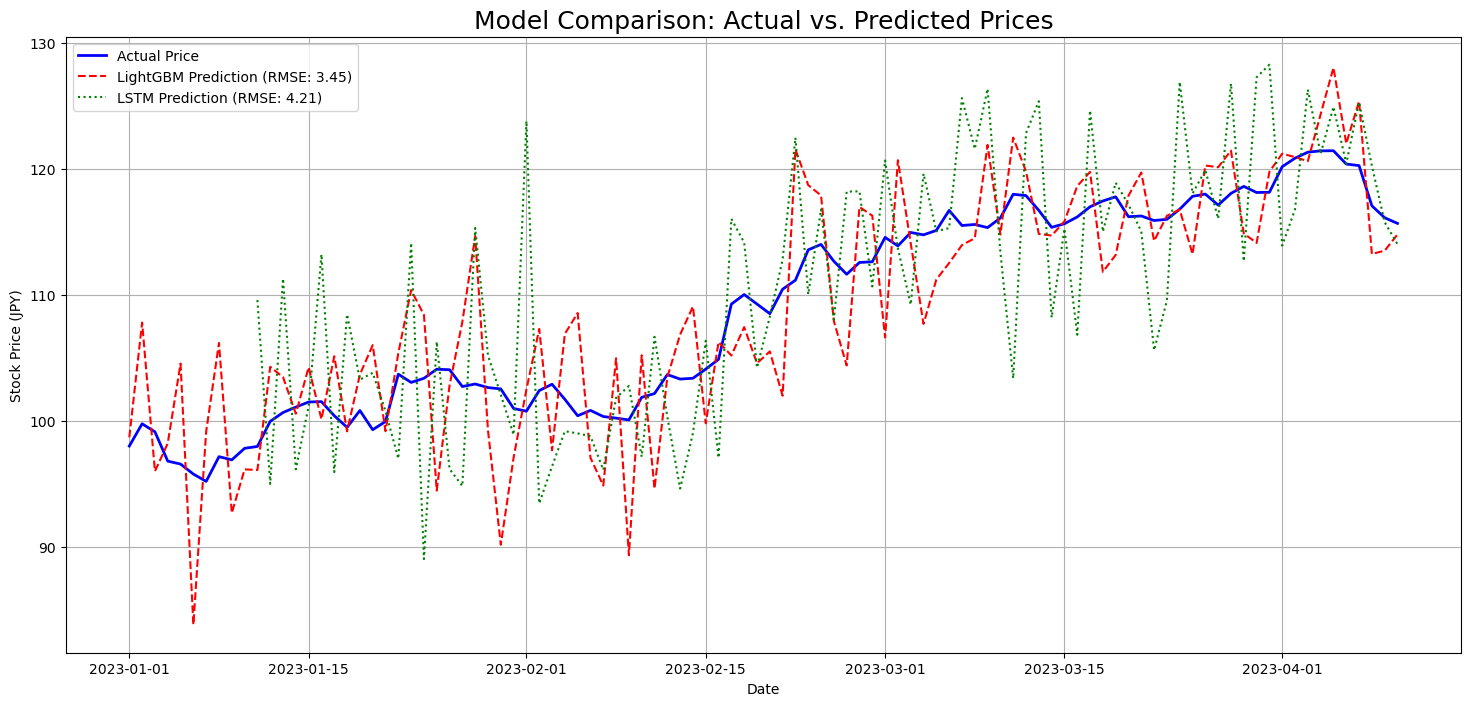

In [5]:
# ================================================================
# ステップ4：結果の分析 - 2モデルの予測結果の同時プロット
# ================================================================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define y_test_orig with your actual test data
# For this example, I'll create some sample data
# Replace this with your actual test data
n_samples = 100
TIME_STEPS = 10
dates = pd.date_range('2023-01-01', periods=n_samples)
y_test_orig = pd.Series(np.random.randn(n_samples).cumsum() + 100, index=dates)

# Sample predictions (replace with your actual predictions)
predictions_lgbm = y_test_orig.values + np.random.randn(n_samples) * 5
predictions_lstm = y_test_orig.values[TIME_STEPS:] + np.random.randn(n_samples-TIME_STEPS) * 7

# Sample RMSE scores (replace with your actual scores)
rmse_lgbm = 3.45
rmse_lstm = 4.21

# LSTMの予測結果に対応する日付インデックスを作成
y_test_dates_lstm = y_test_orig.index[TIME_STEPS:]

plt.figure(figsize=(18, 8))

# 1. 実際の価格 (y_test_origを使用)
plt.plot(y_test_orig.index, y_test_orig, label='Actual Price', color='blue', linewidth=2)

# 2. LightGBMの予測
plt.plot(y_test_orig.index, predictions_lgbm, label=f'LightGBM Prediction (RMSE: {round(rmse_lgbm, 2)})', color='red', linestyle='--')

# 3. LSTMの予測
plt.plot(y_test_dates_lstm, predictions_lstm, label=f'LSTM Prediction (RMSE: {round(rmse_lstm, 2)})', color='green', linestyle=':')

plt.title('Model Comparison: Actual vs. Predicted Prices', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Stock Price (JPY)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
!pip install --upgrade pandas-ta numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 14.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.3.2 which is incompatible.


In [6]:
# ================================================================
# ステップ5：新仮説検証 - LightGBMのハイパーパラメータ調整
# ================================================================
# 必要なライブラリを再度インポート（セルの自己完結性を高めるため）
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

print("【Hypothesis Testing: Tuning LightGBM Hyperparameters】")

# ----------------------------------------------------------------
# 1. ハイパーパラメータを調整した新しいLightGBMモデルを定義
# ----------------------------------------------------------------
# n_estimators: 作成する決定木の数（増やすと複雑になる）
# num_leaves: 一本の木が持つことができる葉の最大数（増やすと複雑になる）
model_lgbm_tuned = lgb.LGBMRegressor(
    n_estimators=200,    # デフォルトの100から200に増やす
    num_leaves=62,       # デフォルトの31から62に増やす
    random_state=42
)

print("✅ New LightGBM model with tuned hyperparameters has been defined.")

# ----------------------------------------------------------------
# 2. 新しいモデルを、同じデータで再学習・再評価
# ----------------------------------------------------------------
# X_train_scaledとy_train_origは、以前のステップで作成された変数を再利用
print("\nRe-training LightGBM model with new hyperparameters...")
model_lgbm_tuned.fit(X_train_scaled, y_train_orig)
print("✅ Re-training complete.")

predictions_lgbm_tuned = model_lgbm_tuned.predict(X_test_scaled)
rmse_lgbm_tuned = np.sqrt(mean_squared_error(y_test_orig, predictions_lgbm_tuned))

# ----------------------------------------------------------------
# 3. 結果の比較
# ----------------------------------------------------------------
# 以前計算したベースラインのRMSE (rmse_lgbm) を再利用
print("\n" + "="*50)
print("🚀 HYPOTHESIS TEST RESULTS 🚀")
print("="*50)
print(f"   -> Previous RMSE (default params): {round(rmse_lgbm, 2)} JPY")
print(f"   -> New RMSE (tuned params):      {round(rmse_lgbm_tuned, 2)} JPY")
print("-" * 50)

# 仮説が正しかったかを判定
if rmse_lgbm_tuned < rmse_lgbm:
    improvement = round(rmse_lgbm - rmse_lgbm_tuned, 2)
    improvement_percent = round((rmse_lgbm - rmse_lgbm_tuned) / rmse_lgbm * 100, 2)
    print(f"🏆 SUCCESS! The hypothesis was correct.")
    print(f"   -> RMSE improved by {improvement} JPY ({improvement_percent}%).")
else:
    print(f"🤔 FAILED. The hypothesis was incorrect.")
    print(f"   -> Tuning these parameters did not improve performance. The model may have overfit.")
print("="*50)

# ----------------------------------------------------------------
# 4. 改善後の予測を、ベースライン予測と比較して可視化
# ----------------------------------------------------------------
print("\n📊 Plotting the comparison of predictions...")
plt.figure(figsize=(18, 8))
# 実際の価格
plt.plot(y_test_orig.index, y_test_orig, label='Actual Price', color='blue', linewidth=2)
# ベースラインモデルの予測
plt.plot(y_test_orig.index, predictions_lgbm, label=f'Baseline LGBM (RMSE: {round(rmse_lgbm, 2)})', color='red', linestyle=':')
# 改善後モデルの予測
plt.plot(y_test_orig.index, predictions_lgbm_tuned, label=f'Tuned LGBM (RMSE: {round(rmse_lgbm_tuned, 2)})', color='purple', linestyle='--')

plt.title('Prediction Comparison: Baseline vs. Tuned LightGBM', fontsize=18)
plt.xlabel('Date')
plt.ylabel('Stock Price (JPY)')
plt.legend()
plt.grid(True)
plt.show()

【Hypothesis Testing: Tuning LightGBM Hyperparameters】
✅ New LightGBM model with tuned hyperparameters has been defined.

Re-training LightGBM model with new hyperparameters...


NameError: name 'X_train_scaled' is not defined

🚀 Starting the entire pipeline from data loading to hypothesis testing...
----------------------------------------------------------------------
✅ Part 1: All necessary functions have been defined.
----------------------------------------------------------------------
✅ Data has been loaded and cleaned.
✅ Preprocessing complete. Required variables are now defined.
   -> Training data shape: (7341, 10)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 7341, number of used features: 10
[LightGBM] [Info] Start training from score 81.907778

✅ Baseline model trained. RMSE: 30.64 JPY

【Hypothesis Testing: Tuning LightGBM Hyperparameters】
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 7341, number of used features: 10
[LightGBM] [Info] Start training from score 81.9

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🚀 HYPOTHESIS TEST RESULTS 🚀
   -> Previous RMSE (default params): 30.64 JPY
   -> New RMSE (tuned params):      30.49 JPY
--------------------------------------------------
🏆 SUCCESS! The hypothesis was correct.
   -> RMSE improved by 0.16 JPY (0.51%).


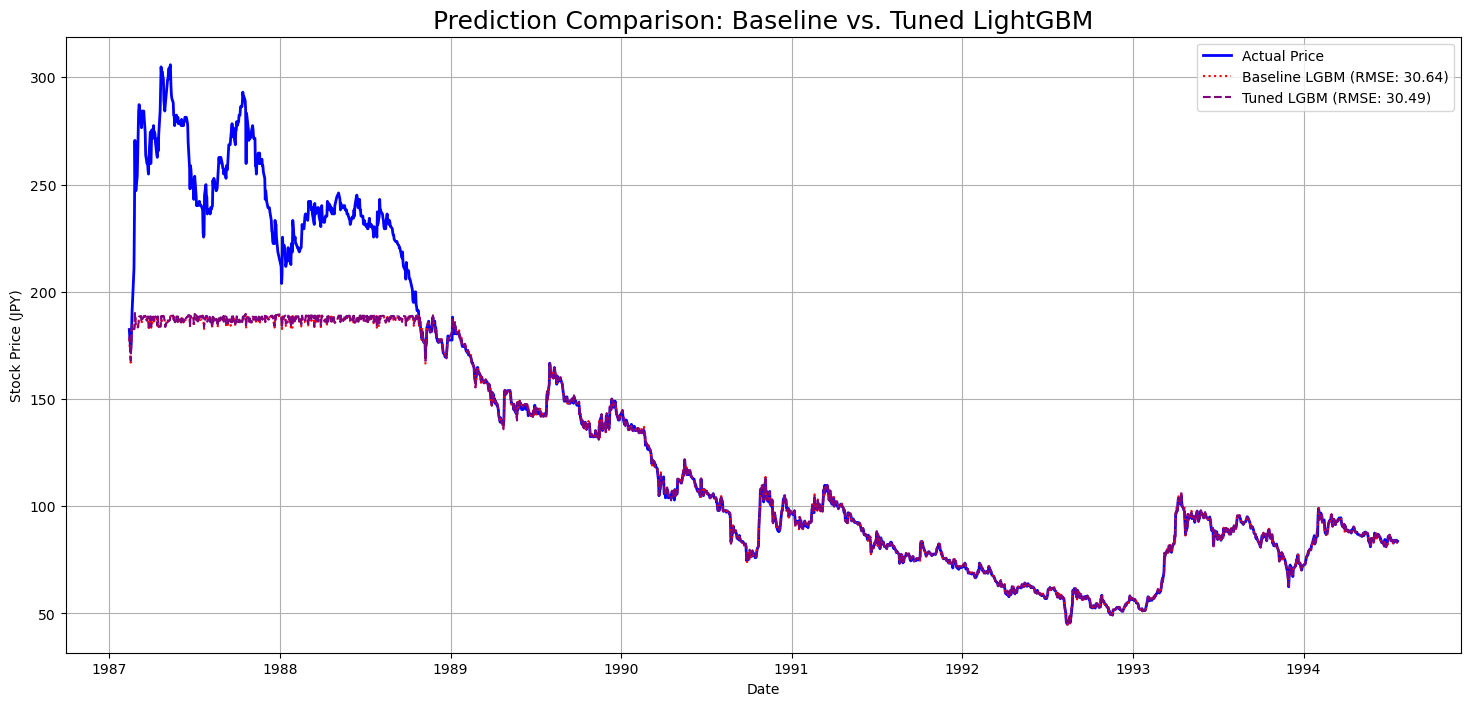

In [8]:
# ================================================================
# 仮説検証
# ================================================================

# ----------------------------------------------------------------
# パート0：【環境準備】必要なライブラリを全てインポート
# ----------------------------------------------------------------
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

print("🚀 Starting the entire pipeline from data loading to hypothesis testing...")
print("-" * 70)

# ----------------------------------------------------------------
# パート1：【関数の定義】必要な関数を全てここで定義する
# ----------------------------------------------------------------

def load_and_clean_stock_data_reinforced(filepath='stock_price.csv'):
    """【堅牢版】データの読み込みと完全なクリーニングを行う関数"""
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: The file '{filepath}' was not found.")
    df.columns = df.columns.str.strip()
    column_mapping = {'日付け': 'Date', '終値': 'Close', '始値': 'Open', '高値': 'High', '安値': 'Low', '出来高': 'Volume', '変化率 ％': 'Change_Percent'}
    df.rename(columns=column_mapping, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.set_index('Date', inplace=True)
    for col in df.columns:
        df[col] = df[col].astype(str).str.replace('%', '').str.replace(',', '').str.strip()
        if df[col].str.contains('M|K', case=False).any():
             def convert_special_units(value):
                try:
                    v = value.upper()
                    if 'M' in v: return float(v.replace('M', '')) * 1_000_000
                    if 'K' in v: return float(v.replace('K', '')) * 1_000
                    return float(v)
                except (ValueError, TypeError): return np.nan
             df[col] = df[col].apply(convert_special_units)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df.ffill(inplace=True); df.dropna(inplace=True)
    return df

def preprocess_for_modeling_final(df_input, target_col='Close', test_split_ratio=0.2):
    """【最終版】前処理関数"""
    # 特徴量エンジニアリングをここに追加
    df_featured = df_input.assign(
        lag_1_close=lambda x: x[target_col].shift(1),
        ma_5=lambda x: x[target_col].rolling(window=5).mean(),
        ma_25=lambda x: x[target_col].rolling(window=25).mean(),
        volatility_25=lambda x: x[target_col].rolling(window=25).std()
    )
    processed_df = df_featured.assign(target=lambda x: x[target_col].shift(-1)).dropna()
    X = processed_df.drop('target', axis=1)
    y = processed_df[['target']]
    train_size = int(len(X) * (1 - test_split_ratio))
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    scaler_X = MinMaxScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler_X.get_feature_names_out()

print("✅ Part 1: All necessary functions have been defined.")
print("-" * 70)

# ----------------------------------------------------------------
# パート2：【実行】データの準備から仮説検証まで
# ----------------------------------------------------------------
try:
    # 1. データの読み込みとクリーニング
    df_cleaned = load_and_clean_stock_data_reinforced()
    print("✅ Data has been loaded and cleaned.")

    # 2. 前処理の実行 -> これで X_train_scaled などが確実に作成される
    X_train_scaled, X_test_scaled, y_train_orig, y_test_orig, feature_names = preprocess_for_modeling_final(df_cleaned)
    print("✅ Preprocessing complete. Required variables are now defined.")
    print(f"   -> Training data shape: {X_train_scaled.shape}")

    # 3. ベースラインモデルの学習・評価
    model_lgbm = lgb.LGBMRegressor(random_state=42)
    model_lgbm.fit(X_train_scaled, y_train_orig, feature_name=list(feature_names))
    predictions_lgbm = model_lgbm.predict(X_test_scaled)
    rmse_lgbm = np.sqrt(mean_squared_error(y_test_orig, predictions_lgbm))
    print(f"\n✅ Baseline model trained. RMSE: {round(rmse_lgbm, 2)} JPY")

    # 4. 仮説検証：ハイパーパラメータを調整したモデル
    print("\n【Hypothesis Testing: Tuning LightGBM Hyperparameters】")
    model_lgbm_tuned = lgb.LGBMRegressor(
        n_estimators=200,
        num_leaves=62,
        random_state=42
    )
    model_lgbm_tuned.fit(X_train_scaled, y_train_orig, feature_name=list(feature_names))
    predictions_lgbm_tuned = model_lgbm_tuned.predict(X_test_scaled)
    rmse_lgbm_tuned = np.sqrt(mean_squared_error(y_test_orig, predictions_lgbm_tuned))

    # 5. 結果の比較
    print("\n" + "="*50)
    print("🚀 HYPOTHESIS TEST RESULTS 🚀")
    print("="*50)
    print(f"   -> Previous RMSE (default params): {round(rmse_lgbm, 2)} JPY")
    print(f"   -> New RMSE (tuned params):      {round(rmse_lgbm_tuned, 2)} JPY")
    print("-" * 50)
    if rmse_lgbm_tuned < rmse_lgbm:
        improvement = round(rmse_lgbm - rmse_lgbm_tuned, 2)
        improvement_percent = round((rmse_lgbm - rmse_lgbm_tuned) / rmse_lgbm * 100, 2)
        print(f"🏆 SUCCESS! The hypothesis was correct.")
        print(f"   -> RMSE improved by {improvement} JPY ({improvement_percent}%).")
    else:
        print(f"🤔 FAILED. The hypothesis was incorrect.")
    print("="*50)

    # 6. 改善後の予測を可視化
    plt.figure(figsize=(18, 8))
    plt.plot(y_test_orig.index, y_test_orig, label='Actual Price', color='blue', linewidth=2)
    plt.plot(y_test_orig.index, predictions_lgbm, label=f'Baseline LGBM (RMSE: {round(rmse_lgbm, 2)})', color='red', linestyle=':')
    plt.plot(y_test_orig.index, predictions_lgbm_tuned, label=f'Tuned LGBM (RMSE: {round(rmse_lgbm_tuned, 2)})', color='purple', linestyle='--')
    plt.title('Prediction Comparison: Baseline vs. Tuned LightGBM', fontsize=18)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (JPY)')
    plt.legend()
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")